In [2]:
import requests
import json
import time
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

C:\Anaconda\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [50]:
def get_sentiment(subreddit):
    
    # First, let's get our data from Reddit
    
    header = {"User-Agent": "windows:r/" + subreddit + ".single.result:v1.0" + "(by /u/serenamcd)"}
    request = requests.get(url = "https://www.reddit.com/r/" + subreddit + ".json", headers = header)
    json_data = json.loads(request.text)
    posts = json.dumps(json_data["data"]["children"], indent = 4, sort_keys = True)
    data_all = json_data["data"]["children"]
    num_posts = 0
    while len(data_all) <= 400:
        # Wait 2 seconds between requests so we don't violate Reddit's API terms.
        time.sleep(2)
        # get last entry, so that we get the url that comes after it, for each loop
        last = data_all[-1]["data"]["name"]
        url = "https://www.reddit.com/r/" + subreddit + "/.json?after=" + str(last)
        request = requests.get(url, headers = header)
        data = json.loads(request.text)
        data_all += data["data"]["children"]
        if num_posts == len(data_all):
            break
        else:
            num_posts = len(data_all)
            
    # Now we've got all our data, let's go on to do some analysis. 
    # We want to categorize it as positive or negative. 
    # We'll use Vader Sentiment Analyzer from NLTK for this, which will rank the text as positive, negative, or neutral. 
    # Vader is especially useful for social media applications.

    get_sentiment = SentimentIntensityAnalyzer()
    positive_list = []
    negative_list = []
    neutral_list = []
    
    for post in data_all:
    
        sentiment = get_sentiment.polarity_scores(post["data"]["title"])
    
        if sentiment["compound"] > 0.2:
            positive_list.append(post["data"]["title"])
        elif sentiment["compound"] < -0.2:
            negative_list.append(post["data"]["title"])
        else:
            neutral_list.append(post["data"]["title"])
        
    with open("positive_" + subreddit + "_titles.txt", "w", encoding = "utf-8", errors = "ignore") as f_positive:
        for post in positive_list:
            f_positive.write(post + "\n")
        
    with open("negative_" + subreddit + "_titles.txt", "w", encoding = "utf-8", errors = "ignore") as f_negative:
        for post in negative_list:
            f_negative.write(post + "\n")
        
    with open("neutral_" + subreddit + "_titles.txt", "w", encoding = "utf-8", errors = "ignore") as f_neutral:
        for post in neutral_list:
            f_neutral.write(post + "\n")
            
    # Plot results
    
    result_distribution = [len(positive_list), len(neutral_list), len(negative_list)]
    result_distribution = [(result*100)/len(data_all) for result in result_distribution]
    
    sns.set_style("white")
    ax = sns.barplot(x = ["Positive", "Neutral", "Negative"], y = result_distribution, color = "blue")
    ax.set(xlabel="Sentiment", ylabel="Percentage")
    sns.despine(left = True, bottom = True)
    # show percentages on top of bar plot
    for patch in ax.patches:
        height = patch.get_height()
        ax.text(patch.get_x() + patch.get_width()/2., height + 0.5, '{:1.2f} %'.format(height), ha = "center")
    ax.set_title("Distribution of Sentiments: r/" + subreddit)
    plt.show()

Thank you to http://www.learndatasci.com/sentiment-analysis-reddit-headlines-pythons-nltk/ for the tutorial!

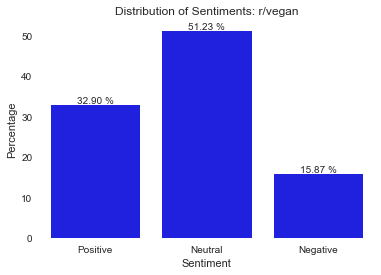

In [43]:
get_sentiment("vegan")

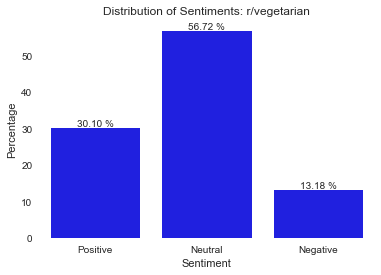

In [48]:
get_sentiment("vegetarian")

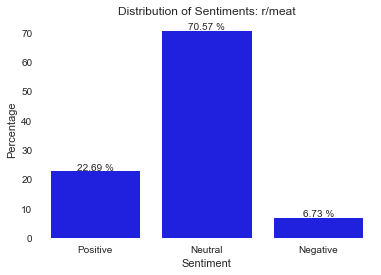

In [55]:
get_sentiment("meat")

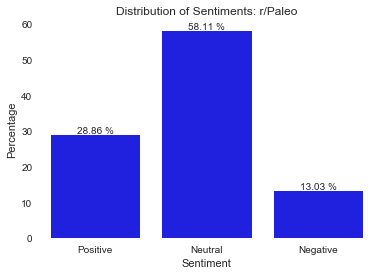

In [44]:
get_sentiment("Paleo")

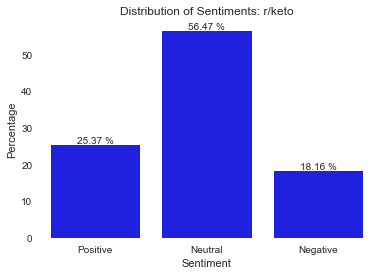

In [47]:
get_sentiment("keto")

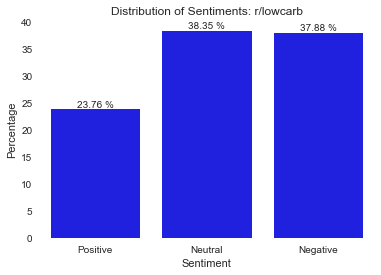

In [51]:
get_sentiment("lowcarb")

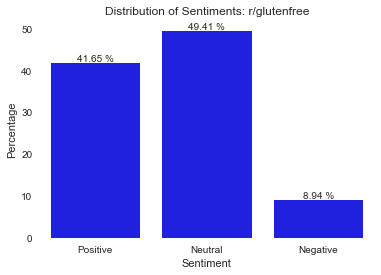

In [52]:
get_sentiment("glutenfree")

Of the diet/lifestyle related subreddits, r/glutenfree has the highest ratio of positive to negative headlines, at 42:9 percent.

The r/meat subreddit had a ratio of 23:7, with the majority of headlines being neutral. 

Next is r/vegan, followed by r/vegatarian with about a third of the headlines being positive, about half neutral, and the rest negative. 

For lower carb diets, such as in r/keto and r/paleo, which are very similar diets, the ratio of positive to negative headlines is slightly lower than those of r/vegan and r/vegetarian. 

Interestingly, r/lowcarb is the only subreddit out of these to have a higher proportion of negative headlines than positive, with a positive to negative ratio of 24:38.

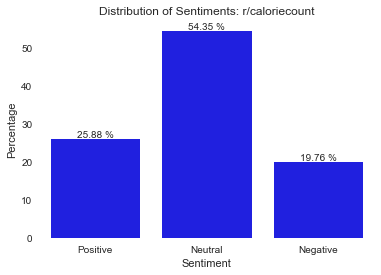

In [46]:
get_sentiment("caloriecount")

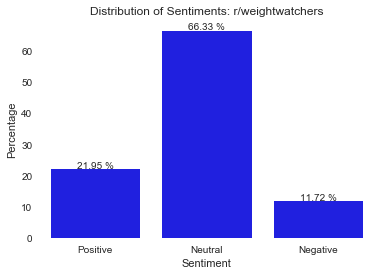

In [53]:
get_sentiment("weightwatchers")

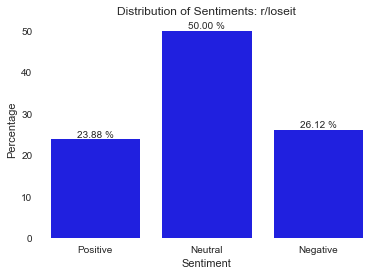

In [54]:
get_sentiment("loseit")

For the subreddits concerned with just losing weight, the ratios were similar to that of r/keto and r/paleo. 

r/caloriecount's ratio was 26:20, while r/weightwatchers was 22:12, and r/loseit was 24:26.